#### In this project, I performed customer segmentation using K-Means clustering on a dataset of mall customers. I began by importing and exploring the dataset, checking for missing values, understanding data types, and generating summary statistics. I focused on two key features which are annual income and spending score for clustering analysis. After extracting these features, I applied the elbow method by plotting the Within Cluster Sum of Squares (WCSS) for different cluster values to determine the optimal number of clusters, which was identified as 5. I then trained the k means model with 5 clusters and predicted the cluster label for each customer. Finally, I visualized the clusters with distinct colors on a scatter plot and interpreted each cluster's behavior, identifying high-value customers, low spenders, and stable segments, providing marketing insights for targeted strategies.

In [1]:
#KMeans is known to have a memory leak on Windows with MKL when there are more than 'n' threads.it can be avoided it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ['OMP_NUM_THREADS']='1'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#### Data Collection and Analysis

In [4]:
customer_data = pd.read_csv(r"C:\Users\hp\Downloads\Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#when we what to know the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
# when we what to know the if there are any missing data
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#when we want to know more information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#involves choosing the annual income column and spending score column(i did slicing choosing the 3rd and 4th index column)
x = customer_data.iloc[:,[3,4]].values

In [10]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [11]:
# this step involves choosing a number of clusters
#we do that by using a parameter called WCSS (Within Clusters Sum of Squares)
#a good cluster should be close to the centroid

In [12]:
#finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

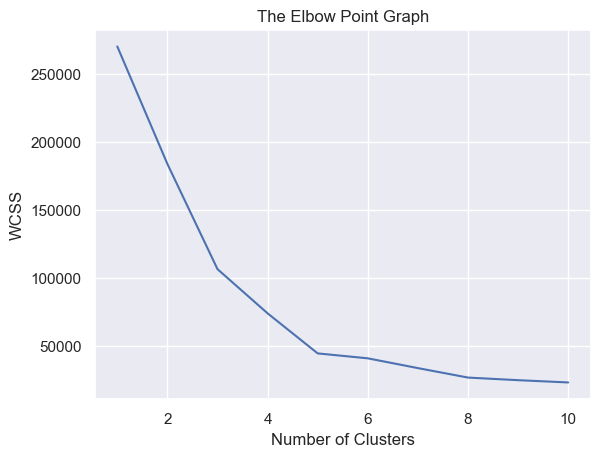

In [25]:
#plot an elbow graph to find which cluster has minimum value
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### we notice that there are two sharp elbow point, happening at 3 and 5, but because 5 is the lowest and thats conisdered as the optimum cluster, we can see there is no elbow point again after 5

In [37]:
#now we train the kmeans clustering model
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)

#return a label for each data point based on their cluster
y = kmeans.fit_predict(x)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#### visualizing all the clusters 

#### 5 Clusters => 0,1,2,3,4

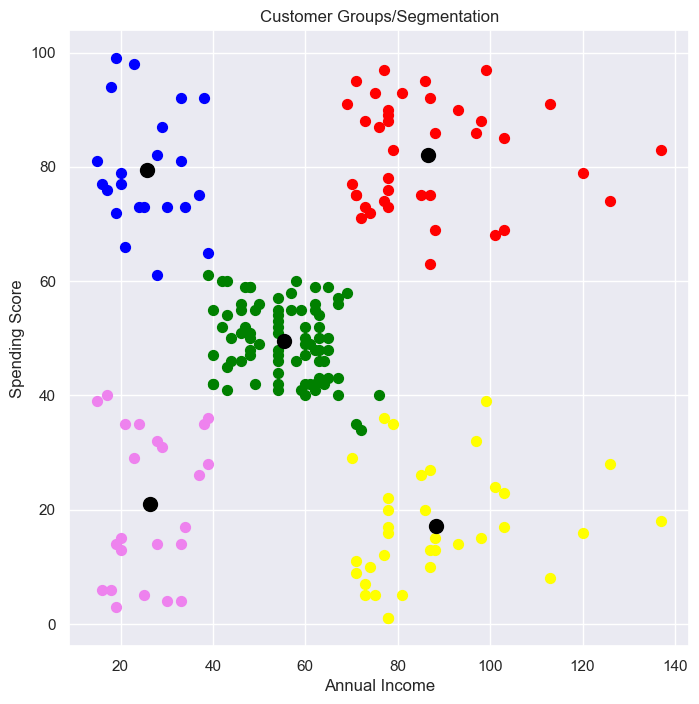

In [43]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='violet', label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title('Customer Groups/Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Firstly cluster 3(Blue Cluster) are high Spenders with low income, that is customers in the top left region have low annual income but high spending scores. These are likely young or impulsive buyers they are valuable for promotions and loyalty rewards. Secondly, in the red cluster which is cluster 2 they are high income and high spending those are customers in the top right are wealthy and spend generously. They are the most profitable segment and ideal for premium marketing campaigns. Thirdly Cluster 4 which is the yellow cluster have high income but low spending, customers in the bottom right earn a lot but have low spending scores. This could signal savers, uninterested buyers, or dissatisfied customers they are worth investigating. Fourthly, we have cluster 1(Green cluster) who have moderate income and moderate spending. The middle segment shows average income and spending.These are stable, regular customers who are good targets for upselling. Lastly, The low income and low spending cluster (Violet Cluster), found in the bottom left, these customers contribute the least in terms of revenue.They might need discounts or budget-friendly promotions to engage more